<a href="https://colab.research.google.com/github/jaguzman/GENERAL-FundamentosEnHerramientasDeTransformacionDigital/blob/master/Unidad%203%20-%20Aprendizaje%20de%20m%C3%A1quinas/2_Aprendizaje%20Supervisado/ArbolesDeDecisionYRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ÁRBOLES DE DECISIÓN!

**Datos Bancarios de Comercialización**

Se cuenta con una base de datos de una campaña de comercialización de un banco portugués. Esta campaña se basó en llamadas telefónicas para ofrecer un producto al cliente y él se suscribía o no. El producto que se les ofreció fue un depósito a plazo.

Información del dataset: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

**OBJETIVO**

Crear un modelo de clasificación, basado en arboles de decisión, que prediga si un cliente se suscribirá a una campaña de comercialización (si/no).



**Contenido**

*   Importar librerías
*   Base de datos
*   Descripción y analítica de datos
*   Preparación de los datos para el algoritmo
*   Árboles de Decisión
    - Clasificador
    - Actividad
*   Random Forest
    - Clasificador
    - Actividad

# **LIBRERÍAS**

In [1]:
# Importar las librerías
import pandas as pd
import numpy as np

# Librerías para graficar
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import graphviz

# Librerías de Aprendizaje de máquinas
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **BASE DE DATOS**

In [2]:
# Leer los datos desde el GitHub
bank = pd.read_csv(
    "https://raw.githubusercontent.com/jaguzman/dataSets/master/datasets/bank.csv",
    sep = ',',         # Se especifica el separador de los datos
    thousands = None,  # Se especifica el separador de miles
    decimal = '.')     # Se especifica el separador de los decimales

# Imprimir el tamaño de la base de datos
print(bank.shape)
# Imprimir las primeras 7 líneas
bank.head(7)

(11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes


**DESCRIPCIÓN DE LA BASE DE DATOS**

**Datos bancarios del cliente**

**[1] Age:** edad  (numérico)

**[2] Job:** tipo de trabajo (categórico) [admin, technician, services, management, retired, blue-collar, unemployed, entrepreneur, housemaid, unknown, self-employed, student]

**[3] Marital:** estado civil (categórico) [married, single, divorced]

**[4] Education:** educación (categórica) [secondary, tertiary, primary, unknown] ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'analfabeto', 'professional.course', 'university.degree', 'unknown']

**[5] Default:** ¿tiene crédito en incumplimiento? (categórico) [yes, no]

**[6] Balance:** balance financiero de la persona (numérico)

**[7] Housing:** ¿tiene préstamo de vivienda? (categórico) [yes, no]

**[8] Loan:** ¿tiene préstamo personal? (categórico) [yes, no]

**Información relacionada con el último contacto con el cliente**

**[9] Contact:** medio de comunicación de contacto (categórico) [unknown, cellular, telephone]

**[10] Month:** mes del año del último contacto (categórico) [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]

**[11] Day:** Día del mes del último contacto (numérico) [1-31]

**[12] Duration:** duración de la llamada del último contacto, en segundos (numérico)

**Otra información**

**[13] Campaing:** número de contactos realizados durante esta campaña (numérico)

**[14] Pdays:** número de días después de que el cliente fue contactado por última vez  (numérico) (999 significa que el cliente no ha sido contactado)

**[15] Previous:** número de contactos realizados antes de esta campaña (numérico)

**[16] Poutcome:**  resultado de la campaña de marketing anterior (categórico) [unknown, other, failure, success]

**Variable de salida**

**[17] deposit:** ¿El cliente se suscribió? (categórico) [yes, no]


In [3]:
# Información de la base de datos: nómbre de la columba, conteo de datos Null y tipo de datos
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


La base de datos no tiene datos nulos. En el caso de que existieran datos nulos se debe tomar alguna decisión, debido a que los algoritmos de aprendizaje de máquina no aceptan datos nulos. Algunas acciones son:

* Eliminar las filas que poseen los datos nulos.
* Eliminar la columna completa.
* Reemplazar los datos nulos por algún valor como la media, la mediana, la moda, valor cero, etc.

Todo dependerá del caso específico y es decisión del analista de datos.

# **DESCRIPCIÓN Y ANALÍTICA DE DATOS**

Graficar la cantidad de personas que se suscribieron y las que no.

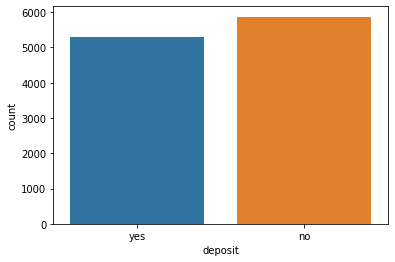

In [4]:
# Esta función realiza una suma de cada categoría y luego las grafica 
sns.countplot(bank['deposit']) 

Otra gráfica para comparar la columna 'deposit'.

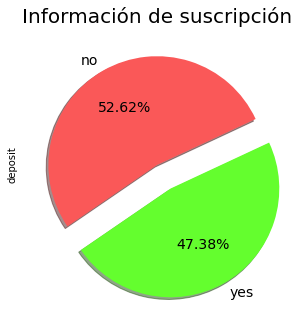

In [5]:
# Tamaño de la imagen
plt.figure(figsize=(5,5)) 
# Título de la imagen
plt.title('Información de suscripción', fontsize=20) 
# Gráficar
bank["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=["#FA5858", "#64FE2E"], fontsize=14, startangle=25)
# explode: separación entre las franjas de la gráfica
# autopct: valor numérico de cada porción
# shadow: sombras en las gráficas
# colors: colores de la gáfica
# fontsize: tamaño de la letra
# startangle: rotar la gráfica
# Consultra la librería para encontrar toda la infomación de los parámetros que se pueden modificar: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html

Se observa que la base de datos está balanceada, es decir, hay casi la misma cantidad de datos en la clase 'yes' que en la clase 'no'. 

Idealmente se espera que la base de datos tenga la misma cantidad de casos para las clases. Para cuando la base de datos está desbalanceada se puede:

* Trabajar el algoritmo de aprendizaje de máquinas con los datos existentes.
* Eliminar datos de la clase que posee más casos.
* Analizar la posibilidad de obtener más datos.
* En algunos casos se pueden implementar estrategias para aumentar los datos, por ejemplo, en procesamiento de imágenes, rotar la imagen.

Todo dependerá del contexto y del problema. Para este caso en particular se tomarán todos los datos.

A continuación, vamos a ver una gráfica de la distribución de los clientes con respecto a su edad.

Text(0.5, 1.0, 'Distribución de la edad de los clientes')

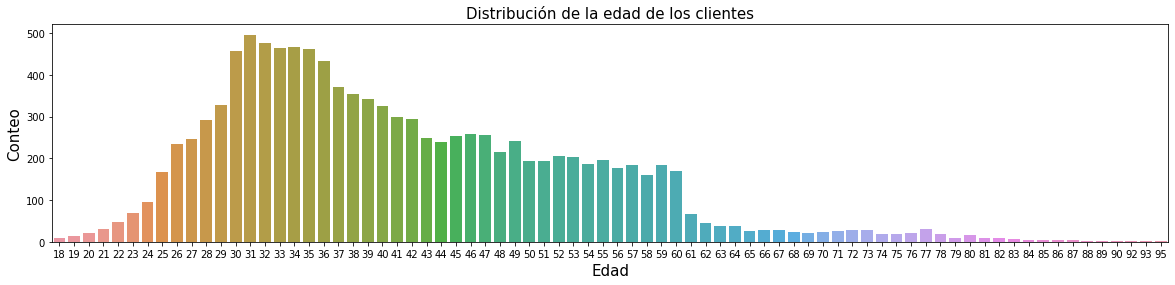

In [6]:
# crear las variables para la gráfica de la figura y los ejes
fig, ax = plt.subplots() 
# definir el tamaño de la gráfica
fig.set_size_inches(20, 4) 
# Columna de la base de datos que se graficará
sns.countplot(x='age', data = bank) 
# eje x
ax.set_xlabel('Edad', fontsize=15) 
# eje y
ax.set_ylabel('Conteo', fontsize=15) 
# título de la gráfica
ax.set_title('Distribución de la edad de los clientes', fontsize=15) 

Gráfica de la cantidad de personas por sus trabajos.

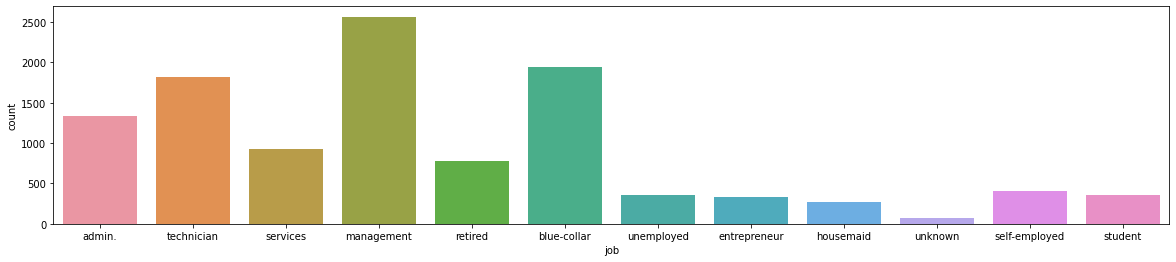

In [7]:
# Tamaño de la gráfica
plt.figure(figsize=(20,4))
# Suma y gráfica de los tipos de trabajo
sns.countplot(x='job', data = bank)

Graficar la relación entre los trabajos y la respuesta final del cliente.

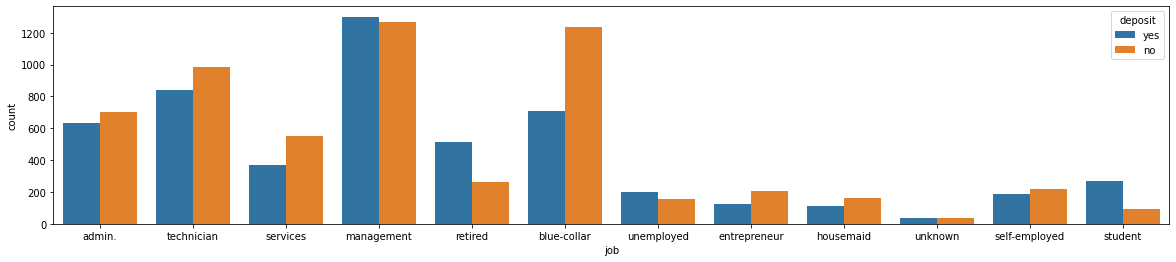

In [8]:
# Tamaño de la gráfica
plt.figure(figsize=(20,4))
# Suma y gráfica de los tipos de trabajo agrupados por la respuesta final del cliente
sns.countplot(x="job", hue="deposit", data=bank)

Graficar la relación entre el estado civil y la respuesta final del cliente.

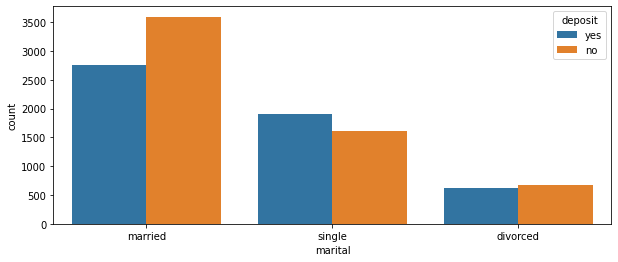

In [9]:
# Tamaño de la gráfica
plt.figure(figsize=(10,4))
# Suma y gráfica del estado civil y agrupados por la respuesta final del cliente
sns.countplot(x="marital", hue="deposit", data=bank)

Graficar la relación el nivel de escolaridad y la respuesta final del cliente.

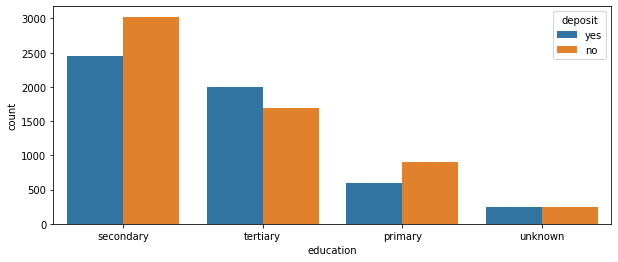

In [10]:
# Tamaño de la gráfica
plt.figure(figsize=(10,4))
# Suma y gráfica del nivel de escolaridad y agrupados por la respuesta final del cliente
sns.countplot(x="education", hue="deposit", data=bank)

Actividad: Graficar la relación entre si tiene crédito en incumplimiento ('default') y la respuesta final del cliente.

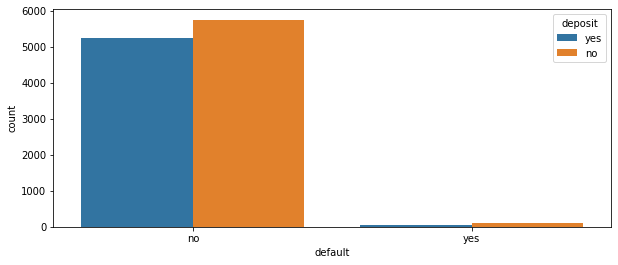

In [11]:
# Tamaño de la gráfica
plt.figure(figsize=(10,4))
# Suma y gráfica del incumplimiento y agrupados por la respuesta final del cliente
sns.countplot(x="default", hue="deposit", data=bank)

Actividad: Graficar la relación entre si tiene crédito de vivienda ('housing') y la respuesta final del cliente.

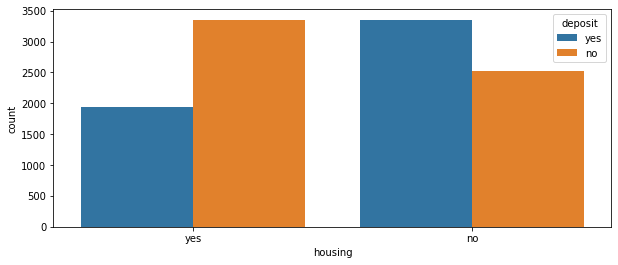

In [12]:
# Tamaño de la gráfica
plt.figure(figsize=(10,4))
# Suma y gráfica de si tiene crédito de vivienda y agrupados por la respuesta final del cliente
sns.countplot(x="housing", hue="deposit", data=bank)

Actividad: Graficar la relación entre si tiene crédito personal ('loan') y la respuesta final del cliente.

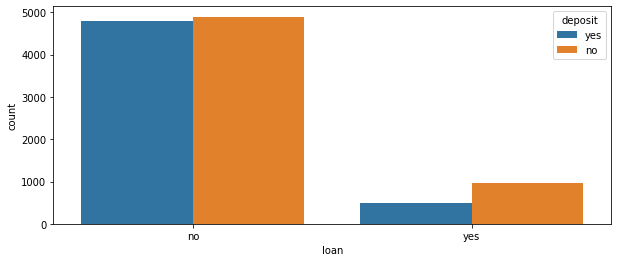

In [13]:
# Tamaño de la gráfica
plt.figure(figsize=(10,4))
# Suma y gráfica de si tiene crédito personal y agrupados por la respuesta final del cliente
sns.countplot(x="loan", hue="deposit", data=bank)

Ver la distribución de los datos de 'contact', 'month' y 'day'. Todos en una misma figura.

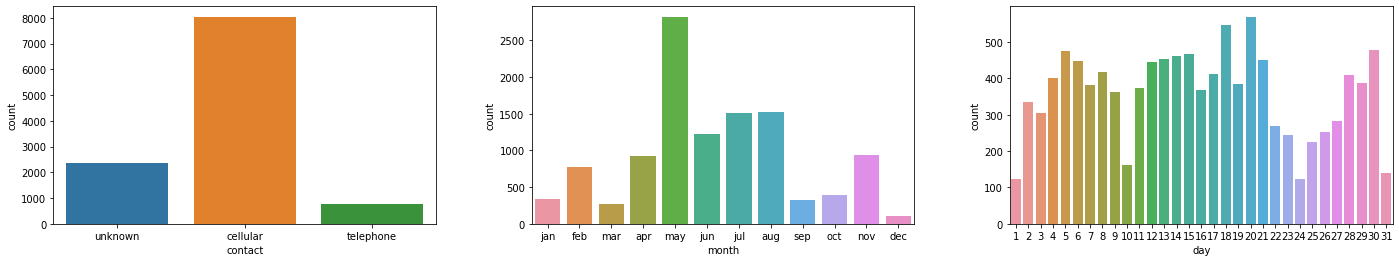

In [14]:
# Definición de figura con 3 gráficas de 1x3 y se define el tamaño de la figura
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (24,4))
# Gráfica 1: Suma de los tipos de contacto
sns.countplot(bank['contact'], ax = ax1)
# Gráfica 2: suma de los meses de contacto
sns.countplot(bank['month'], ax = ax2, order = ['jan','feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
# Gráfica 3: suma de los días del mes de contacto
sns.countplot(bank['day'], ax = ax3)
plt.subplots_adjust(wspace=0.25)

Ahora se grafica para una variabale numérica la relación entre la duración de la llamada y la respuesta final del cliente.

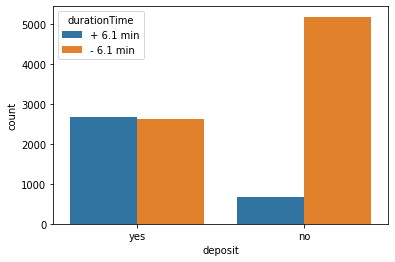

In [15]:
# Se hace una copia de la duración de la llamada
bank['durationTime'] = bank['duration'].copy()
# Si la duración de la llamada dura más de 371 segundos (6.1 min) se marca como 1, sino como 0
bank['durationTime'] = bank['durationTime'].map(lambda x: '+ 6.1 min' if x > 420 else '- 6.1 min')
# Agrupar por respuesta final y duración de la llamada
label = bank.deposit
sns.countplot(label,hue=bank['durationTime'])
# Se elimina la comuna temporal durationTime
bank.drop(columns = ["durationTime"],inplace=True)

Ver la distribución de los datos de la las variables numéricas 'campaign', 'pdays', 'previous'.

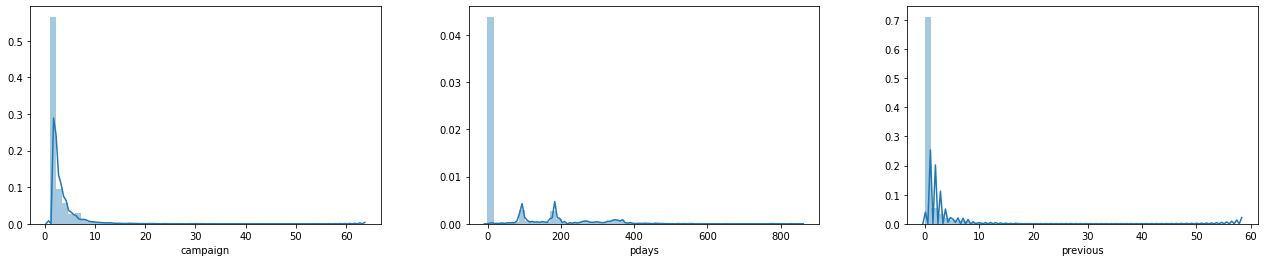

In [16]:
# Definición de figura con 3 gráficas de 1x3 y se define el tamaño de la figura
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (22,4))
# Gráfica 1: distribución de los valores de campaing
sns.distplot(bank.campaign, ax = ax1)
# Gráfica 2: distribución de los valores de pdays
sns.distplot(bank.pdays, ax = ax2)
# Gráfica 3: distribución de los valores de previous
sns.distplot(bank.previous, ax = ax3)
plt.subplots_adjust(wspace=0.25)

Actividad: ver la distribución de la variabale 'balance'.

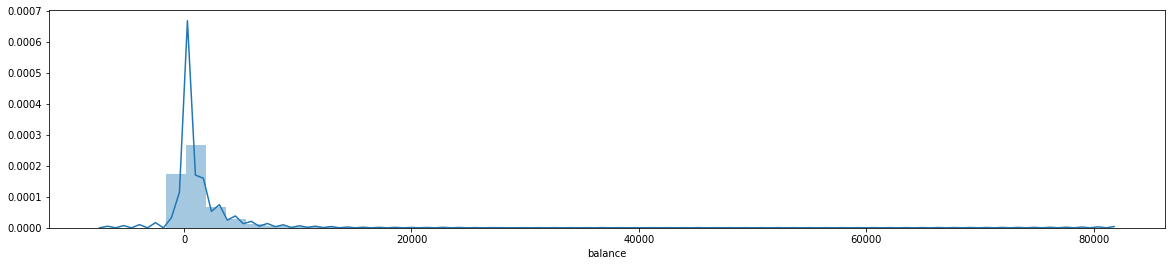

In [17]:
# Tamaño de la gráfica
plt.figure(figsize=(20,4))
# Distribución de los valores de balance
sns.distplot(bank.balance)

Actividad: ver la relación de los datos de la variable 'poutcome'.

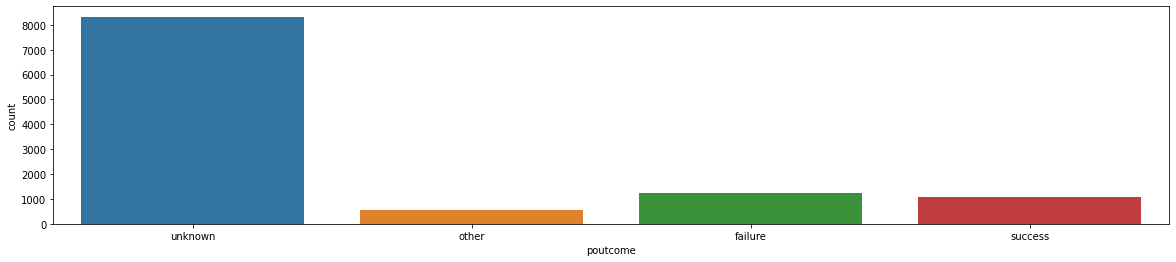

In [18]:
# Tamaño de la gráfica
plt.figure(figsize=(20,4))
# Suma y gráfica del resultado de la campaña anterior
sns.countplot(x='poutcome', data = bank)

# **PREPARACIÓN DE LOS DATOS PARA EL ALGORITMO**

**Pasar de variables categórica a variable numéricas**

Opción 1: se pueden mapear las variables categóricas a numéricas

In [19]:
# Función lambda para cambiar los valores de 'yes=1' y 'no=0'
bank['deposit'] = bank['deposit'].map(lambda x: 1 if x == 'yes' else 0)
# Imprimir los primeros 5 datos de la base de datos
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


Opción 2: la función Encoder asigna un número a cada categoría (desde 0 hasta el número de categorías-1).

In [20]:
# Definición de la función LabelEncoder
labelencoder_X = LabelEncoder()
# Realizar la conversión a todas las variables categoricas asignandóles un número iniciando desde 0
bank['job']      = labelencoder_X.fit_transform(bank['job']) 
bank['marital']  = labelencoder_X.fit_transform(bank['marital']) 
bank['education']= labelencoder_X.fit_transform(bank['education']) 
bank['default']  = labelencoder_X.fit_transform(bank['default']) 
bank['housing']  = labelencoder_X.fit_transform(bank['housing'])
bank['loan']  = labelencoder_X.fit_transform(bank['loan'])
bank['contact']  = labelencoder_X.fit_transform(bank['contact']) 
bank['month']  = labelencoder_X.fit_transform(bank['month'])
# Imprimir los primeros 5 datos de la base de datos 
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,unknown,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,unknown,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,unknown,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,unknown,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,unknown,1


Opción 3: Convertir variables categóricas a dummies, por cada categoría se crea una columna. Y se marca con 1 cuando la fila corresponda a la categoría.

In [21]:
# función para convertir en dummies una columna
bank = pd.get_dummies(data=bank, columns = ['poutcome'], prefix = ['p'])
# bank['poutcome'] = labelencoder_X.fit_transform(bank['poutcome']) 
# Imprimir los primeros 5 datos de la base de datos
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit,p_failure,p_other,p_success,p_unknown
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,1,0,0,0,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,1,0,0,0,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,1,0,0,0,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,1,0,0,0,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,1,0,0,0,1


pdays: Número de días que pasaron después de que el cliente fue contactado por última vez (numérico) (-1 significa que el cliente no fue contactado previamente). Entonces se mapea el valor -1 para un valor de muy alto, lo que significaría que es muy poco probable que el cliente haya sido contactado


In [0]:
# Reemplazar -1 por 10000
bank.loc[bank['pdays'] == -1, 'pdays'] = 1000

In [23]:
# descripción de todas las variables de la base de datos
bank.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit,p_failure,p_other,p_success,p_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.015051,1528.538524,0.473123,0.130801,0.489697,15.658036,5.445709,371.993818,2.508421,797.820641,0.832557,0.473840,0.110016,0.048110,0.095951,0.745924
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.818724,8.420740,3.191939,347.128386,2.722077,351.708922,2.292007,0.499338,0.312924,0.214008,0.294537,0.435360
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,3.000000,138.000000,1.000000,521.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,1000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3881.000000,63.000000,1000.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **ÁRBOL DE DECISIÓN: CLASIFICADOR**

Se separa la base de datos entre datos de entrenamiento y datos de pruebas (80% - 20%)

In [0]:
# Se toma la base de datos menos la variable de interes 'deposit'
x = bank.drop('deposit', 1)
# Se toma la variable de interés
y = bank.deposit
# Función que separa los datos datos de X y Y de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [25]:
# Árbol de decisión de profundidad = 2
modelo1 = tree.DecisionTreeClassifier(max_depth=2)
# Entrenamiento del modelo
modelo1.fit(x_train, y_train)
# Cálculo de la exactitud media del proceso de entrenamiento
modelo1_score_train = modelo1.score(x_train, y_train)
# Imprimir el resultado
print("Exactitud en el entrenamiento: ",modelo1_score_train)
# Cálculo de la exactitud media del proceso de testeo
modelo1_score_test = modelo1.score(x_test, y_test)
# Imprimir el resultado
print("Exactitud en la prueba: ",modelo1_score_test)

Exactitud en el entrenamiento:  0.76738716541606
Exactitud en la prueba:  0.7671294223018361


Graficar el árbol de decisión

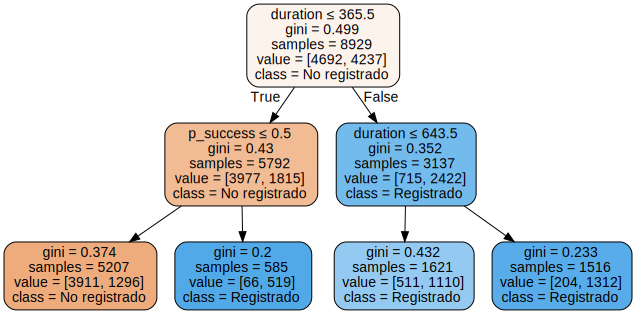

In [26]:
# Definición del nombre de las características
features_names = x.columns.tolist()
# Definición de la salida del sistema
classes_names = ['No registrado', 'Registrado']

# Configurar el tamaño de la gráfica
rcParams['figure.figsize'] = 10,10

Arbol = tree.export_graphviz(modelo1, out_file=None, 
                      feature_names=features_names,  
                      class_names=classes_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  

graph = graphviz.Source(Arbol)  
graph

Como leer el Árbol de decisión

1. El nodo inicial pregunta si la duración de la llamada es menor o igual a 365.5.
2. Si es así (True), se mueve hacia abajo al nodo secundario izquierdo de la raíz (profundidad 1, izquierda).
3. Este nodo pregunta si la variable p_success es menor o igual a 0.5 (esta variable es 1 cuando el usuario se registró en la campaña anterior o 0 si el usuario no se registró en la campaña anterior).
4. Si es así (True), se mueve hacia abajo a la izquierda de la raíz (profundidad 2, izquierda). 'Concluyendo que la clase en No registrado'.
5. Si no es así (False), se mueve hacia abajo a la derecha de la raíz (profundidad 2, segundo nodo). 'Concluyendo que la clase en Registrado'.
6. Volviendo al nodo inicial, si la duración de la llamada es mayor a 365 debe moverse hacia el nodo secundario derecho de la raíz (profundidad 1, derecha)
7. Luego se pregunta: ¿el ancho del pétalo es menor que 1.75 cm? 
8. Todos los casos siguientes concluyen que la clase en 'Registrado'.






Atributos de los nodos

- Samples: de 8929 muestras (primer nodo), 5792 tienen duración menor o igual a 365.5 (nodo 2 izquierda) y 3137 muestras tiene mayor duración (nodo 2 derecha).
- Value: indica a cuántas instancias de entrenamiento de cada clase se aplica este nodo: por ejemplo, el primer nodo aplica 4692 a 0 No registrado y 4235 a 1 Registrado. 
- gini: (impureza). Un nodo es "puro" (gini = 0) si todas las instancias de entrenamiento a las que se aplica pertenecen a la misma clase. Para el primer nodo Gini igual a 1 - (4692/8929)^2 - (4235/8929)^2 ≈ 0.499.

Analizar cuáles son las características más importantes del modelo.

In [27]:
# Valor numérico de cada característica del árbol de decisión
fi = modelo1.feature_importances_
# Imprimir las características con su respectivo valor
l = len(features_names)
for i in range(0,len(features_names)):
    print('{:.<20} {:3}'.format(features_names[i],fi[i]))

age................. 0.0
job................. 0.0
marital............. 0.0
education........... 0.0
default............. 0.0
balance............. 0.0
housing............. 0.0
loan................ 0.0
contact............. 0.0
day................. 0.0
month............... 0.0
duration............ 0.6792534143106161
campaign............ 0.0
pdays............... 0.0
previous............ 0.0
p_failure........... 0.0
p_other............. 0.0
p_success........... 0.3207465856893839
p_unknown........... 0.0


**ACTIVIDAD**
1. Crear otro modelo de Árbol de Decisión con profundidad = 4.
2. Imprimir el modelo del Árbol de Decisión.
3. Crear otro modelo de Árbol de Decisión con profundidad máxima.
4. Imprimir las características más importantes.
5. Comparar todos los modelos y determinar cuál de ellos es el mejor.

**Solución 1. Árbol de Decisión profundidad = 4**

In [28]:
# Árbol de Decisión de profundidad = 4
modelo2 = tree.DecisionTreeClassifier(max_depth=4)
# Entrenamiento del modelo
modelo2.fit(x_train, y_train)
# Cálculo de la exactitud media del proceso de entrenamiento
modelo2_score_train = modelo2.score(x_train, y_train)
# Imprimir el resultado
print("Exactitud en el entrenamiento: ",modelo2_score_train)
# Cálculo de la exactitud media del proceso de testeo
modelo2_score_test = modelo2.score(x_test, y_test)
# Imprimir el resultado
print("Exactitud en el testeo: ",modelo2_score_test)

Exactitud en el entrenamiento:  0.7763467353567028
Exactitud en el testeo:  0.7756381549484997


**Solución 2. Imprimir el Árbol de Decisión**

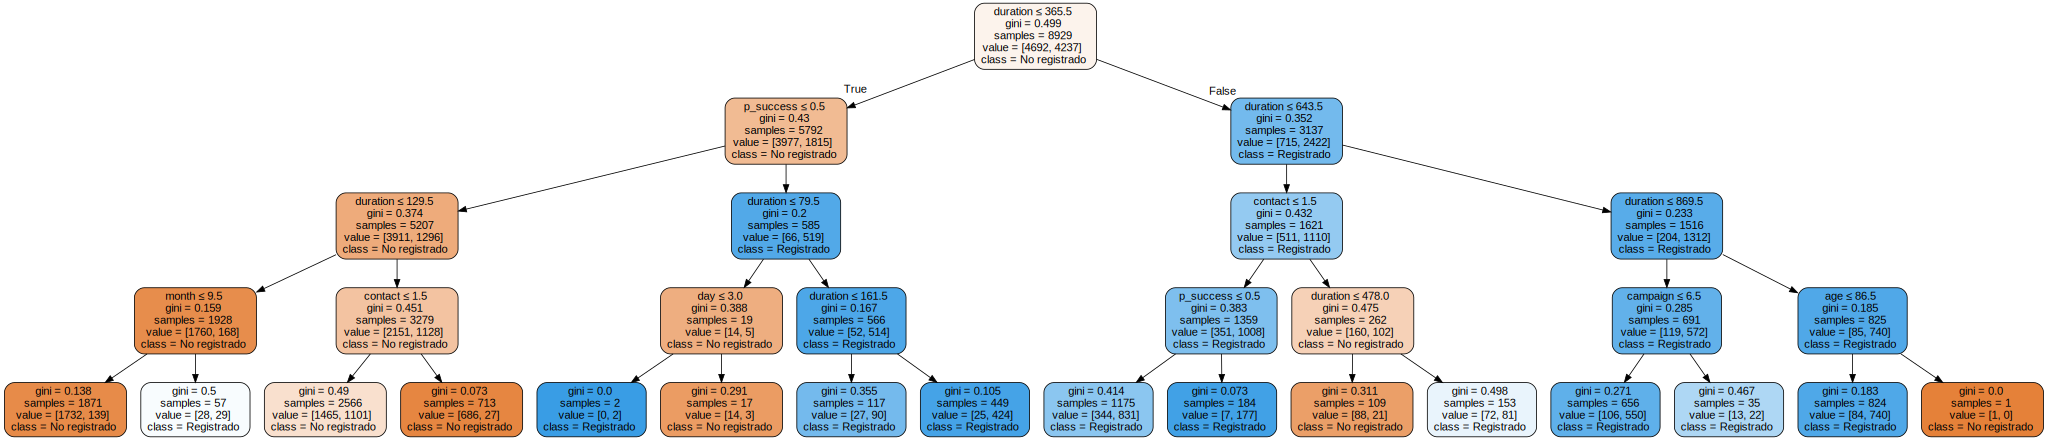

In [29]:
# Se imprime el Árbol
Arbol = tree.export_graphviz(modelo2, out_file=None, 
                      feature_names=features_names,  
                      class_names=classes_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(Arbol) 
graph 

**Solución 3. Árbol de Decisión con profundidad máxima**

In [30]:
# Árbol de Decisión de profundidad máxima
modelo3 = tree.DecisionTreeClassifier()
# Entrenamiento del modelo
modelo3.fit(x_train, y_train)
# Cálculo de la exactitud media del proceso de entrenamiento
modelo3_score_train = modelo3.score(x_train, y_train)
# Imprimir el resultado
print("Exactitud en el entrenamiento: ",modelo3_score_train)
# Cálculo de la exactitud media del proceso de testeo
modelo3_score_test = modelo3.score(x_test, y_test)
# Imprimir el resultado
print("Exactitud en el testeo: ",modelo3_score_test)

Exactitud en el entrenamiento:  1.0
Exactitud en el testeo:  0.7922077922077922


**Solución 4. Imprimir las características más importantes del modelo de máxima profundidad**

In [31]:
# Valor numérico de cada característica del Árbol de Decisión
fi = modelo3.feature_importances_
# Imprimir las características con su respectivo valor
l = len(features_names)
for i in range(0,len(features_names)):
    print('{:.<20} {:3}'.format(features_names[i],fi[i]))

age................. 0.07623724372666825
job................. 0.03355648443753786
marital............. 0.012069380675288647
education........... 0.01490289134057929
default............. 0.00037428731570342423
balance............. 0.08439395336061983
housing............. 0.030764426023711086
loan................ 0.009692578260285868
contact............. 0.05391998798031435
day................. 0.07378362637944992
month............... 0.09790105028355932
duration............ 0.3333513995450698
campaign............ 0.029135314699065166
pdays............... 0.028678822628943203
previous............ 0.011962046245744
p_failure........... 0.002540538001385064
p_other............. 0.0027171551562084183
p_success........... 0.10113649229262713
p_unknown........... 0.0028823216472394567


**Solución 5. Comparar los modelos anteriores**

In [32]:
# Comparación de los modelos exactitud

print('{:10} {:20} {:20}'.format('Profundidad', 'Desempeño entrenamiento','Desempeño prueba'))
print('{:10} {:20} {:20}'.format('-----------', '-----------------------','----------------'))
print('{:1} {:>26} {:>25}'.format(2, modelo1_score_train, modelo1_score_test))
print('{:1} {:>28} {:>23}'.format(4, modelo2_score_train, modelo2_score_test))
print('{:1} {:>11} {:>37}'.format("max", modelo3_score_train, modelo3_score_test))

Profundidad Desempeño entrenamiento Desempeño prueba    
----------- ----------------------- ----------------    
2           0.76738716541606        0.7671294223018361
4           0.7763467353567028      0.7756381549484997
max         1.0                    0.7922077922077922


# **RANDOM FOREST: CLASIFICADOR**

In [0]:
# Se toma la base de datos menos la variable de interes 'deposit'
x = bank.drop('deposit', 1)
# Se toma la variable de interés
y = bank.deposit
# Función que separa los datos datos de X y Y de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [34]:
# Ranom fores con 100 árboles
RFC_1 = RandomForestClassifier(n_estimators = 100)#criterion = entopy,gini
# Entrenamiento del modelo
RFC_1.fit(x_train, y_train)
# Cálculo de la exactitud media del proceso de testeo
modeloRFC_1_score_test = RFC_1.score(x_test, y_test)
# Imprimir el resultado
print("Exactitud en el testeo: ", modeloRFC_1_score_test)

Exactitud en el testeo:  0.8522167487684729


Mostrar la relación de las características más importantes.

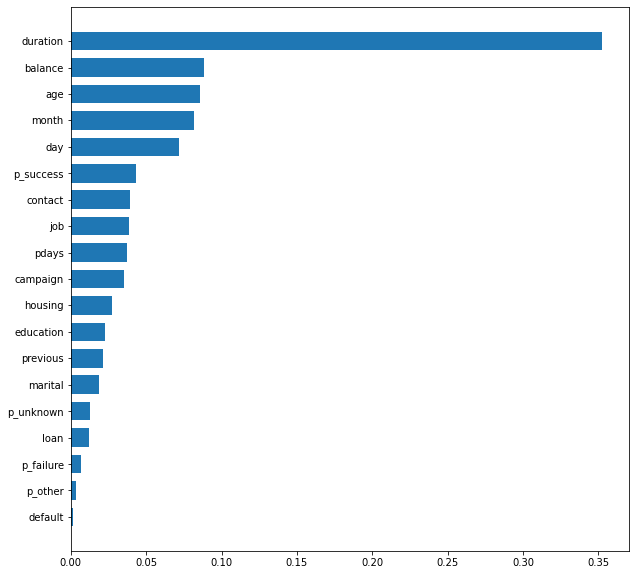

In [35]:
tree_importance_sorted_idx = np.argsort(RFC_1.feature_importances_)
tree_indices = np.arange(0, len(RFC_1.feature_importances_)) + 0.5
# crear las variables para la gráfica de la figura y los ejes
fig, ax = plt.subplots() 
# definir el tamaño de la gráfica
fig.set_size_inches(10, 10) 
# Dato a graficar
plt.barh(tree_indices, RFC_1.feature_importances_[tree_importance_sorted_idx], height=0.7)
# eje y
ax.set_yticklabels( x_train.columns[tree_importance_sorted_idx])
ax.set_yticks(tree_indices)
# Imprimir la gráfica
plt.show()

Estas características fueron seleccionadas en un proceso de ajuste con 100 árboles de decisión. Así que se puede asumir que su orden es coherente. Realizar un análisis de características se puede, por ejemplo, filtrar características que no son relevantes para el modelo.

**ACTIVIDAD**
1. Crear un modelo de Random Forest sin las 9 características menos importantes.
2. Crear un modelo de Random Forest sin la característica 'duration'.

**Solución 1. Módelo de Ramdom Forest sin las características menos importantes**

In [36]:
# Se toma la base de datos menos la variable de interes 'deposit'
x = bank.drop('deposit', 1)
# Eliminar las características menos importantes
x = x.drop(['default', 'p_other', 'p_failure', 'loan', 'p_unknown', 'marital', 'previous', 'education', 'housing'], axis=1)
# Se toma la variable de interés
y = bank.deposit
# Función que separa los datos datos de X y Y de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)
x.head()

,age,job,balance,contact,day,month,duration,campaign,pdays,p_success
0,59,0,2343,2,5,8,1042,1,1000,0
1,56,0,45,2,5,8,1467,1,1000,0
2,41,9,1270,2,5,8,1389,1,1000,0
3,55,7,2476,2,5,8,579,1,1000,0
4,54,0,184,2,5,8,673,2,1000,0


In [37]:
# Ranom fores con 100 árboles
RFC_2 = RandomForestClassifier(n_estimators = 100)#criterion = entopy,gini
# Entrenamiento del modelo
RFC_2.fit(x_train, y_train)
# Cálculo de la exactitud media del proceso de testeo
modeloRFC_2_score_test = RFC_2.score(x_test, y_test)
# Imprimir el resultado
print("Exactitud en el testeo: ", modeloRFC_2_score_test)

Exactitud en el testeo:  0.8495297805642633


**Solución 2. Módelo de Ramdom Forest sin la característica 'duration'**

In [38]:
# Se toma la base de datos menos la variable de interes 'deposit'
x = bank.drop('deposit', 1)
# Eliminar las características menos importantes
x = x.drop('duration', 1)
# Se toma la variable de interés
y = bank.deposit
# Función que separa los datos datos de X y Y de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,p_failure,p_other,p_success,p_unknown
0,59,0,1,1,0,2343,1,0,2,5,8,1,1000,0,0,0,0,1
1,56,0,1,1,0,45,0,0,2,5,8,1,1000,0,0,0,0,1
2,41,9,1,1,0,1270,1,0,2,5,8,1,1000,0,0,0,0,1
3,55,7,1,1,0,2476,1,0,2,5,8,1,1000,0,0,0,0,1
4,54,0,1,2,0,184,0,0,2,5,8,2,1000,0,0,0,0,1


In [39]:
# Ranom fores con 100 árboles
RFC_3 = RandomForestClassifier(n_estimators = 100)#criterion = entopy,gini
# Entrenamiento del modelo
RFC_3.fit(x_train, y_train)
# Cálculo de la exactitud media del proceso de testeo
modeloRFC_3_score_test = RFC_3.score(x_test, y_test)
# Imprimir el resultado
print("Exactitud en el testeo: ", modeloRFC_3_score_test)

Exactitud en el testeo:  0.7277205553067622
